In [1]:
from XRDXRFutils import ChiSearch,ChiMap,GammaSearch,GammaMap,FastSpectraXRD,DatabaseXRD, DataXRD, SpectraXRD, GaussNewton, PhaseList, PhaseMap, PhaseSearch, PhaseMapSave

import os
import pickle

from XRDXRFutils import snip3d,convolve3d

from joblib import Parallel, delayed
import h5py
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit, least_squares

from scipy.signal import windows

from numpy import arange,linspace,concatenate,sqrt,log,histogram,newaxis,pad,fft,array,asarray,array_split
from matplotlib.pyplot import fill_between,sca,legend,imshow,subplots,plot,xlim,ylim,xlabel,ylabel,cm,title,scatter,colorbar,figure,vlines
from sklearn.cluster import KMeans,MiniBatchKMeans

from PIL import Image

import gc

from multiprocessing import Process,Queue

from joblib import Parallel,delayed

import threading

In [2]:
path_xrd = '/home/shared/dataXRDXRF/MunchMuseum/M491/ProfiloXRD/'
path_database = '/home/shared/DatabaseXRD'

In [3]:
%%time
try:
    data = DataXRD().load_h5(path_xrd + 'xrd.h5')
except:
    print('Reading from raw data.')
    data = DataXRD().read_params(path_xrd + 'Scanning_Parameters.txt').read(path_xrd).calibrate_from_file(path_xrd + 'calibration.ini').remove_background().save_h5(path_xrd + 'xrd.h5')

Loading: /home/shared/dataXRDXRF/MunchMuseum/M491/ProfiloXRD/xrd.h5
CPU times: user 7.66 ms, sys: 150 ms, total: 158 ms
Wall time: 155 ms


In [4]:
database = DatabaseXRD().read_cifs(path_database)
print('Phases in database:',len(database))

Phases in database: 137


In [5]:
lazurite = database['Lazurite'][0]
hydrocerussite = database['Hydrocerussite'][0]
cinnabar = database['Cinnabar'][1]
barite = database['Barite'][0]
spinel = database['Spinel'][0]
calcite = database['Calcite'][0]
hematite = database['Hematite'][4]

phases = PhaseList([hydrocerussite,lazurite,cinnabar])

min_theta = 20
max_theta = 53
min_intensity = 0.1
first_n_peaks = None

phases.get_theta(min_intensity=min_intensity,
                 min_theta = min_theta,
                 max_theta = max_theta,
                first_n_peaks = first_n_peaks)

(array([20.93971943, 24.69207474, 27.18665762, 34.04367108, 34.18152332,
        40.42823653, 42.6228012 , 43.04402736, 44.21036078, 48.24071298,
        49.014125  , 23.94038756, 31.06153655, 34.11266972, 42.10609553,
        26.51331315, 28.15070761, 31.19598604, 43.62074332, 45.75881859,
        51.77486834, 52.72567416]),
 array([0.27071, 0.74861, 1.     , 0.34109, 0.53856, 0.24343, 0.14858,
        0.18136, 0.18249, 0.12698, 0.29295, 1.     , 0.11682, 0.27028,
        0.13034, 0.76186, 0.219  , 1.     , 0.37672, 0.32453, 0.11862,
        0.2239 ]))

In [6]:
data.data.shape

(95, 170, 1280)

In [7]:
%%time
x = GammaMap().from_data(data,phases)

CPU times: user 1.69 s, sys: 103 ms, total: 1.79 s
Wall time: 1.79 s


In [10]:
%%time
x[0].search()

CPU times: user 21 ms, sys: 996 µs, total: 22 ms
Wall time: 19.8 ms


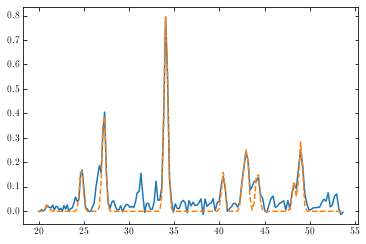

In [11]:
x[0][0].plot_spectrum()
x[0][0].plot('--')

In [ ]:
%%time
x = x.search()

In [11]:
%%time
y = ChiMap().from_data(data,phases)

CPU times: user 1.04 s, sys: 49.5 ms, total: 1.09 s
Wall time: 1.09 s


In [12]:
%%time
y[0].search()

(1280, 3)
(1280, 3)
(1280, 3)
(1280, 5)
(1280, 5)
(1280, 5)
(1280, 5)
(1280, 5)
(1280, 5)
(1280, 3)
(1280, 3)
(1280, 3)
CPU times: user 21.2 ms, sys: 879 µs, total: 22.1 ms
Wall time: 19.4 ms


In [ ]:
%%time
y = y.search()